Importovanie potrebných knižníc

In [1]:
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.graphics.correlation import plot_corr
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import  classification_report
import VisualizeNN as VisNN
plt.style.use('seaborn')


Načítanie datasetu

In [2]:
df = pd.read_csv('data.csv',header=0)

In [3]:

df.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China


Základné info o datasete

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Fever                    316800 non-null  int64 
 1   Tiredness                316800 non-null  int64 
 2   Dry-Cough                316800 non-null  int64 
 3   Difficulty-in-Breathing  316800 non-null  int64 
 4   Sore-Throat              316800 non-null  int64 
 5   None_Sympton             316800 non-null  int64 
 6   Pains                    316800 non-null  int64 
 7   Nasal-Congestion         316800 non-null  int64 
 8   Runny-Nose               316800 non-null  int64 
 9   Diarrhea                 316800 non-null  int64 
 10  None_Experiencing        316800 non-null  int64 
 11  Age_0-9                  316800 non-null  int64 
 12  Age_10-19                316800 non-null  int64 
 13  Age_20-24                316800 non-null  int64 
 14  Age_25-59           

In [5]:
list(df.columns)

['Fever',
 'Tiredness',
 'Dry-Cough',
 'Difficulty-in-Breathing',
 'Sore-Throat',
 'None_Sympton',
 'Pains',
 'Nasal-Congestion',
 'Runny-Nose',
 'Diarrhea',
 'None_Experiencing',
 'Age_0-9',
 'Age_10-19',
 'Age_20-24',
 'Age_25-59',
 'Age_60+',
 'Gender_Female',
 'Gender_Male',
 'Gender_Transgender',
 'Severity_Mild',
 'Severity_Moderate',
 'Severity_None',
 'Severity_Severe',
 'Contact_Dont-Know',
 'Contact_No',
 'Contact_Yes',
 'Country']

Zlúčenie niektorých stĺpcov do jedného

In [6]:
severity=[]
gender=[]
age=[]
contact=[]
for index, row in df.iterrows():
    if row['Severity_Severe'] == 1:
        severity.append(3)
    if row['Severity_Moderate'] == 1:
        severity.append(2)
    if row['Severity_Mild'] == 1:
        severity.append(1)
    if row['Severity_None'] == 1:
        severity.append(0) 
    if row['Age_0-9'] == 1:
        age.append(0)
    if row['Age_10-19'] == 1:
        age.append(1) 
    if row['Age_20-24'] == 1:
        age.append(2) 
    if row['Age_25-59'] == 1:
        age.append(3) 
    if row['Age_60+'] == 1:
        age.append(4) 
    if row['Gender_Female'] == 1:
        gender.append(0) 
    if row['Gender_Male'] == 1:
        gender.append(1) 
    if row['Gender_Transgender'] == 1:
        gender.append(2) 
    if row['Contact_Dont-Know'] == 1:
        contact.append(0) 
    if row['Contact_No'] == 1:
        contact.append(1) 
    if row['Contact_Yes'] == 1:
        contact.append(2) 
   


Pridanie stĺpcov do dataframu

In [7]:
df['severity']=severity
df['Age']=age
df['Gender']=gender
df['contact']=contact


C:\Users\mvlca\anaconda3\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


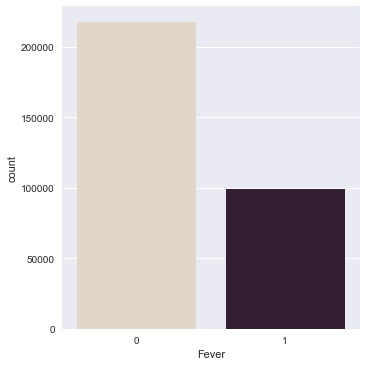

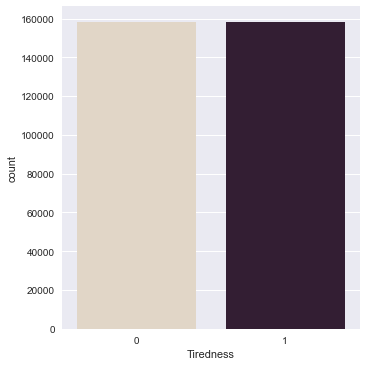

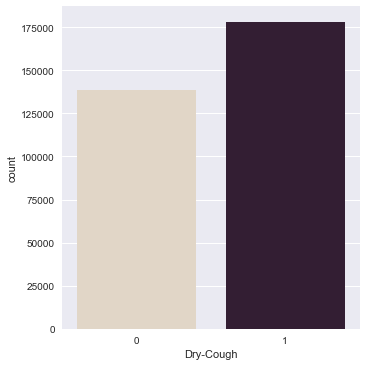

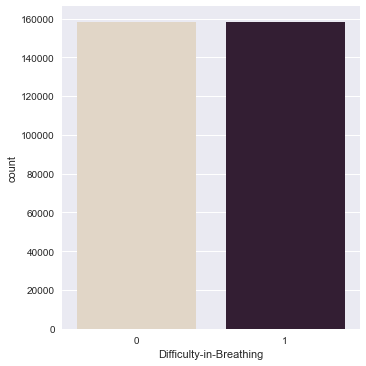

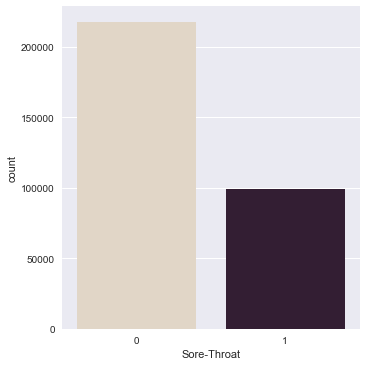

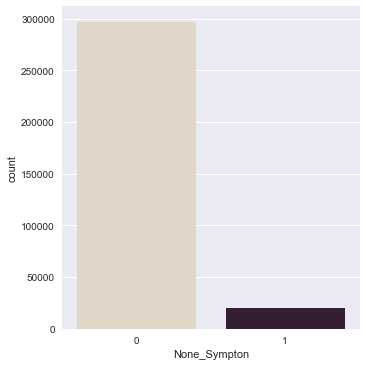

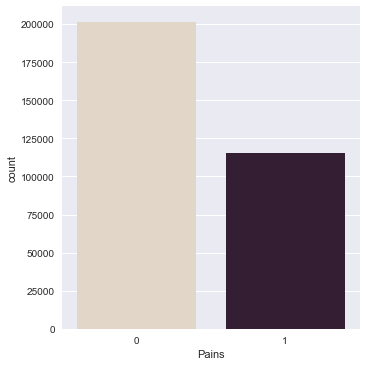

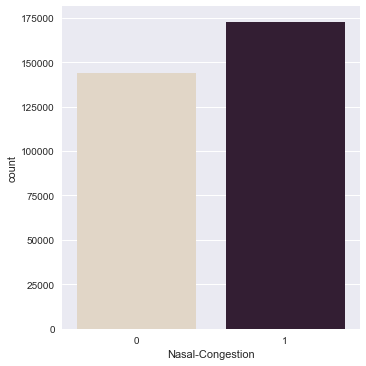

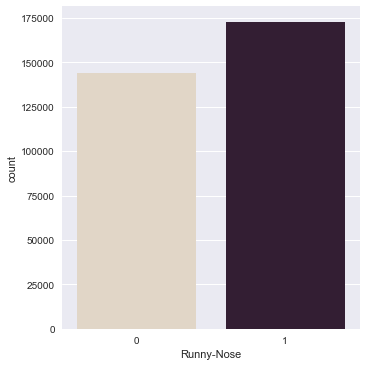

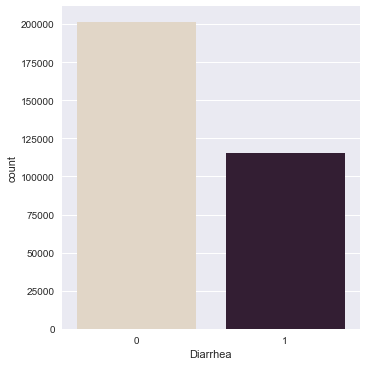

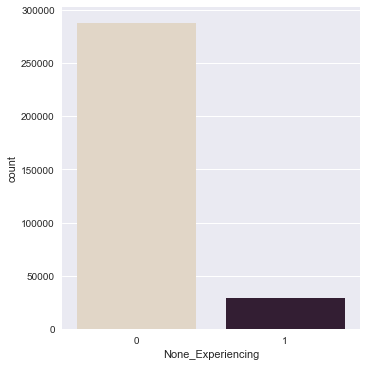

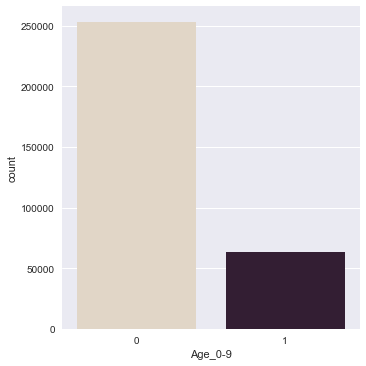

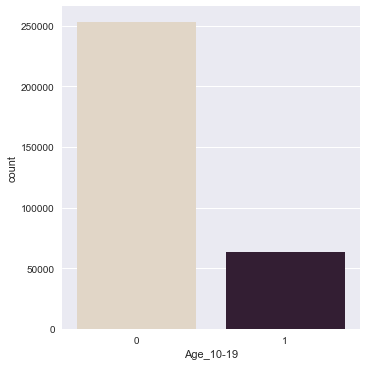

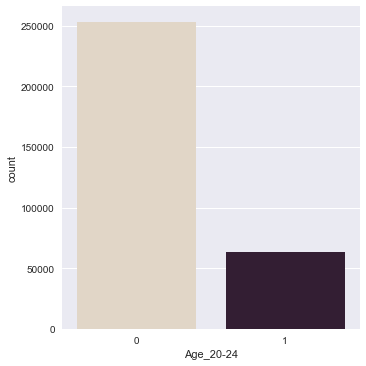

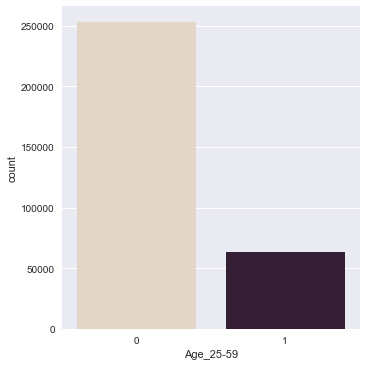

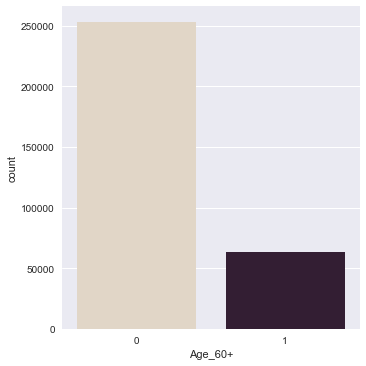

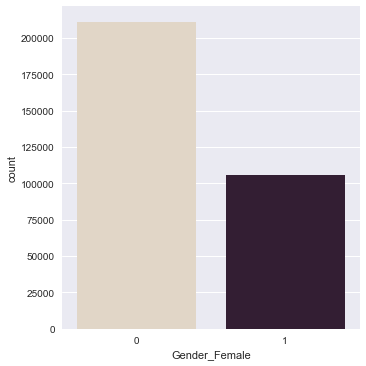

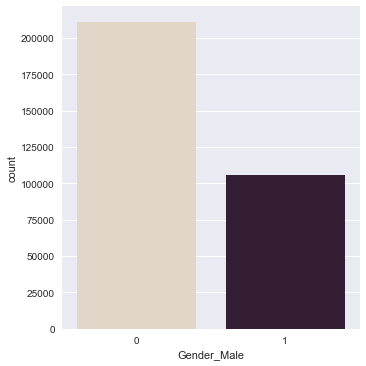

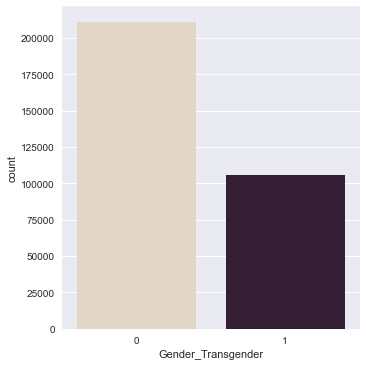

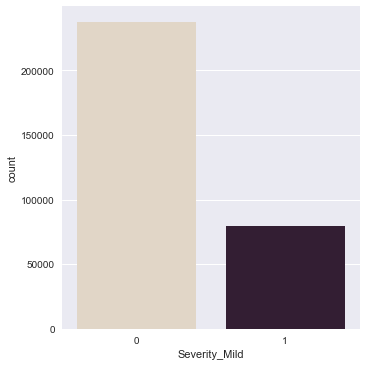

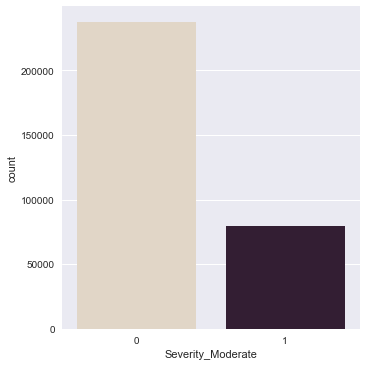

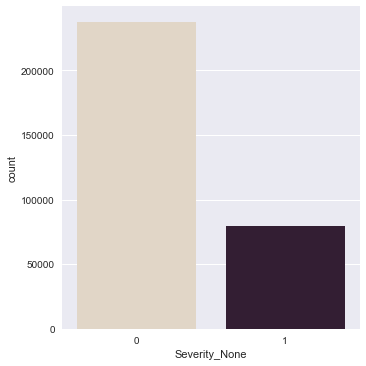

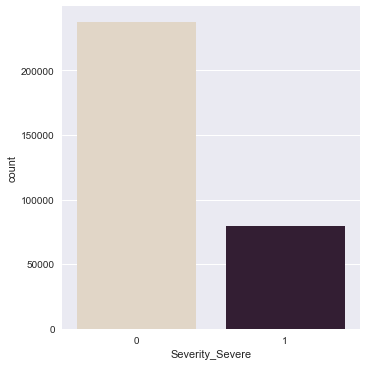

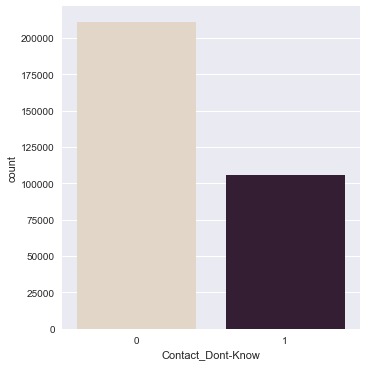

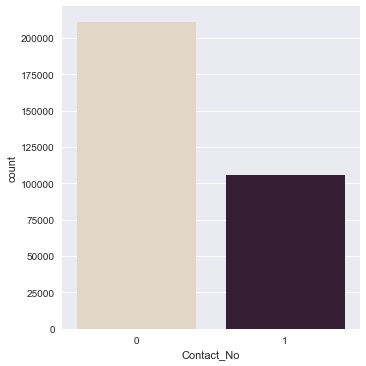

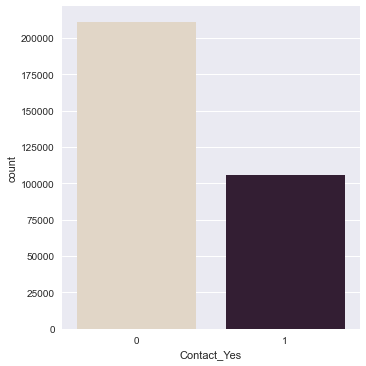

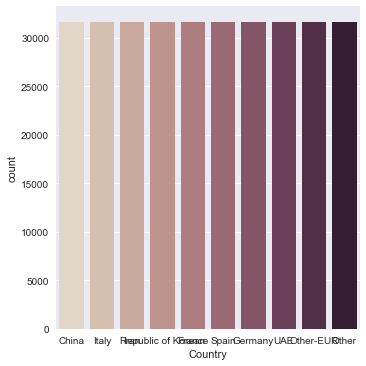

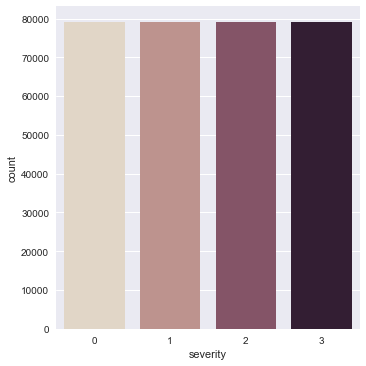

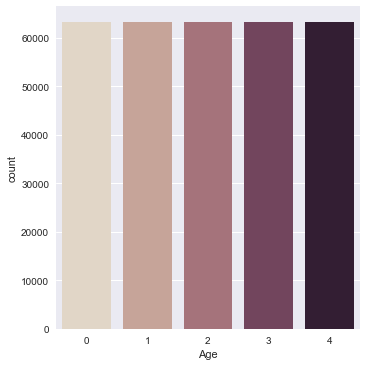

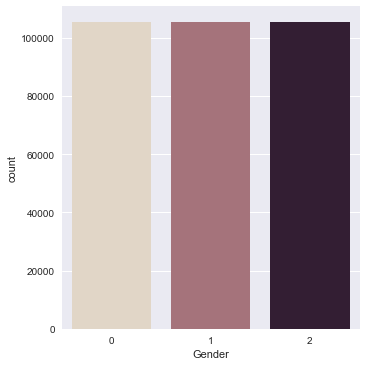

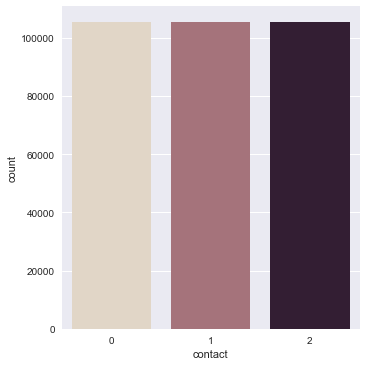

In [62]:
for col in df.columns:
       sns.catplot(x=col, kind="count", palette="ch:.25", data=df) 

Skontrolovanie zastúpenia jednotlivých vekových kategórii

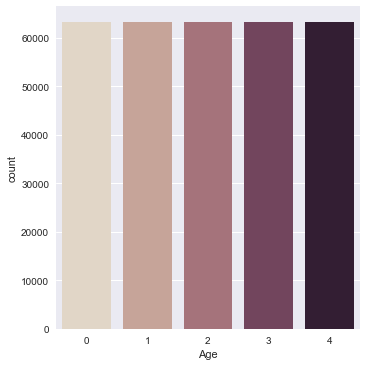

In [8]:
sns.catplot(x="Age", kind="count", palette="ch:.25", data=df)

Skontrolovanie zastúpenia jednotlivých závažností

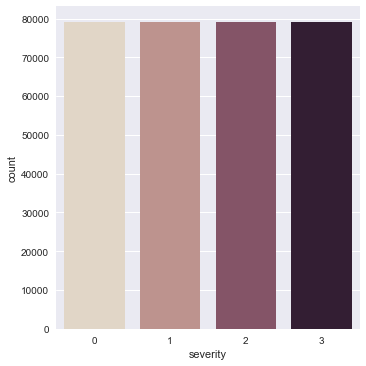

In [9]:
sns.catplot(x="severity", kind="count", palette="ch:.25", data=df)


Skontrolovanie zastúpenia jednotlivých pohlavií

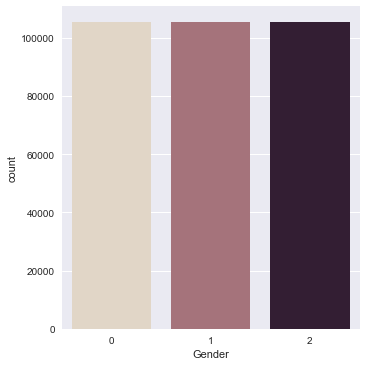

In [10]:
sns.catplot(x="Gender", kind="count", palette="ch:.25", data=df)

In [11]:
corr_data = df[['Fever',
 'Tiredness',
 'Dry-Cough',
 'Difficulty-in-Breathing',
 'Sore-Throat',
 'None_Sympton',
 'Pains',
 'Nasal-Congestion',
 'Runny-Nose',
 'Diarrhea',
 'None_Experiencing',
 'contact',
    'severity',
    'Gender']]


Vizualizácia korelácie

<AxesSubplot:>

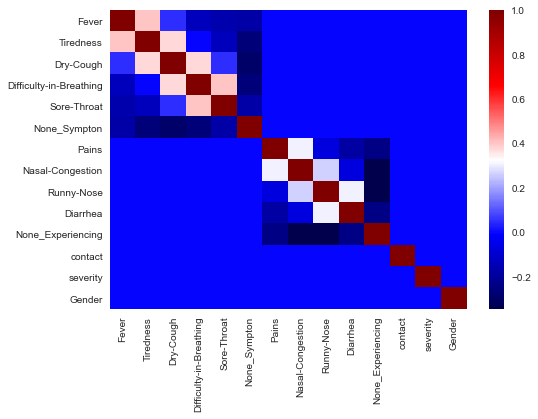

In [12]:
cor = corr_data.corr()
sns.heatmap(cor, cmap="seismic")

Vybranie stĺpcov ktoré chcem použiť
Rozdelenie dát na trénovacie a testovacie v 3:7

In [13]:
X = df[['Fever',
        'Tiredness',
        'Dry-Cough',
        'Difficulty-in-Breathing',
        'Sore-Throat',
        'None_Sympton',
        'Pains',
        'Nasal-Congestion',
        'Runny-Nose',
        'Diarrhea',
        'None_Experiencing',
        'contact',
        'Age',  
        'Gender'      
 ]]
y = df[[ 'Severity_Severe'
 ]]
test_data_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_data_size)

Využívame viacvrstvový perceptrón
Aktivačnú funkciu využívam relu, pretože s inými sa nedosahovala iná presnosť.
Zvolil som 2 skryté vrstvy. V 1. vrstve som zvolil 6 a v 2. 3 neuróny na základe:<br>
geometrického pyramidového pravidla<br>
r = (nbrINP/nbrOUT)^(1/3)<br>
nbrHID1 = nbrOUT*(r^2) – počet neurónov v 1. skrytej vrstve<br>
nbrHID2 = nbrOUT*r  – počet neurónov v 2. skrytej vrstve<br>
Zdroj:
str.7
https://core.ac.uk/download/pdf/299806673.pdf

In [14]:
modelmlp=MLPClassifier(activation='relu',solver='adam',alpha=0.001,hidden_layer_sizes=(6,3),max_iter=10000)

In [15]:
print(modelmlp.fit(X_train,y_train))
print("y_train úspešnosť: %f" % modelmlp.score(X_train, y_train))
print("y_test úspešnosť: %f" % modelmlp.score(X_test, y_test))

C:\Users\mvlca\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MLPClassifier(alpha=0.001, hidden_layer_sizes=(6, 3), max_iter=10000)
y_train úspešnosť: 0.750162
y_test úspešnosť: 0.749621


In [16]:
modelmlp.predict_proba(X_test)

array([[0.75040146, 0.24959854],
       [0.75499755, 0.24500245],
       [0.74874917, 0.25125083],
       ...,
       [0.75437333, 0.24562667],
       [0.75180776, 0.24819224],
       [0.75195005, 0.24804995]])

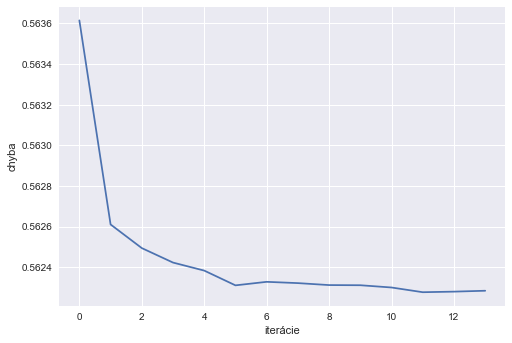

In [17]:
plt.xlabel('iterácie')
plt.ylabel('chyba')
plt.plot(modelmlp.loss_curve_)

In [18]:
modelmlp.loss_curve_

[0.5636149637251284,
 0.5626100999405202,
 0.5624936702176808,
 0.5624224109844902,
 0.5623829107765054,
 0.5623102138932159,
 0.5623275487581552,
 0.562321243590208,
 0.5623115586810142,
 0.5623108006764284,
 0.5622996532242028,
 0.5622764412606817,
 0.5622792880390884,
 0.56228367830438]

In [58]:
modelmlp.out_activation_

'logistic'

In [19]:
y_pred = modelmlp.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86     71244
           1       0.00      0.00      0.00     23796

    accuracy                           0.75     95040
   macro avg       0.37      0.50      0.43     95040
weighted avg       0.56      0.75      0.64     95040



C:\Users\mvlca\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
modelmlp.best_loss_

0.5622764412606817

In [21]:
modelmlp.coefs_

[array([[-0.17425959, -0.27331005,  0.3571033 ,  0.06983132, -0.15825717,
         -0.01802688],
        [-0.26004267,  0.17800584, -0.48345214,  0.34439308, -0.06242288,
         -0.02954123],
        [ 0.1961822 ,  0.06468522,  0.22562012,  0.21586834,  0.25317921,
         -0.05616722],
        [-0.40092494, -0.38048435,  0.44751648,  0.28638707, -0.1336312 ,
          0.08080338],
        [ 0.27069267,  0.47072187, -0.21810978, -0.11637072,  0.34007649,
         -0.08997391],
        [ 0.24796556,  0.1202899 ,  0.2690438 , -0.31436955,  0.18974618,
          0.39912408],
        [-0.1955223 ,  0.4348773 , -0.06529138, -0.21824908,  0.43373915,
          0.06951071],
        [-0.25838134, -0.17511183,  0.30917209,  0.2092564 ,  0.04115615,
          0.09267707],
        [-0.11800704, -0.26107762, -0.08711401,  0.16960309, -0.35583057,
         -0.19536393],
        [ 0.33737096, -0.1736366 , -0.09442426,  0.40505574, -0.15072234,
         -0.04086315],
        [-0.13300453, -0.17564

Vizualizácia použitej neurónovej siete

In [22]:
network_structure = np.hstack(([X.shape[1]], np.asarray(modelmlp.hidden_layer_sizes), [y.shape[1]]))

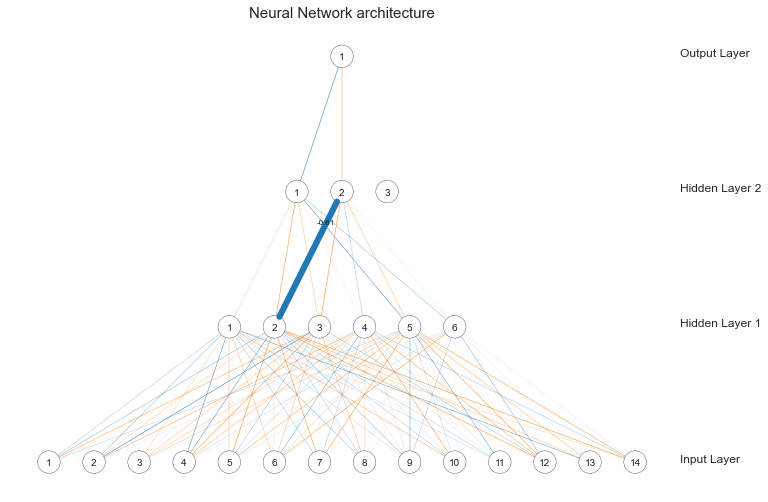

In [23]:
network=VisNN.DrawNN(network_structure, modelmlp.coefs_)
network.draw()

Vyskúšal som aj klasifikovať do 4 závažností ale presnosť bola veľmi nízka cca 0.25

Vybranie stĺpcov ktoré chcem použiť
tentokrát chceme určiť druh závažnosti zo 4 kategórií

In [40]:
X2 = df[['Fever',
         'Tiredness',
         'Dry-Cough',
         'Difficulty-in-Breathing',
         'Sore-Throat',
         'None_Sympton',
         'Pains',
         'Nasal-Congestion',
         'Runny-Nose',
         'Diarrhea',
         'None_Experiencing',
         'contact',
         'Age',        
         'Gender'      
 ]]
y2 = df[[ 'severity']]
test_data_size = 0.3
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = test_data_size)


In [41]:
modelmlp2=MLPClassifier(activation='relu',alpha=0.001,hidden_layer_sizes=(6,3),max_iter=10000)

In [42]:
print(modelmlp2.fit(X2_train,y2_train))
print("y2_train úspešnosť: %f" % modelmlp2.score(X2_train, y2_train))
print("y2_test úspešnosť: %f" % modelmlp2.score(X2_test, y2_test))

C:\Users\mvlca\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MLPClassifier(alpha=0.001, hidden_layer_sizes=(6, 3), max_iter=10000)
y2_train úspešnosť: 0.251488
y2_test úspešnosť: 0.246528


In [43]:
y2_pred = modelmlp2.predict(X2_test)

print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.25      0.47      0.33     23864
           1       0.24      0.31      0.27     23565
           2       0.25      0.20      0.22     23903
           3       0.00      0.00      0.00     23708

    accuracy                           0.25     95040
   macro avg       0.18      0.25      0.21     95040
weighted avg       0.18      0.25      0.21     95040



C:\Users\mvlca\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


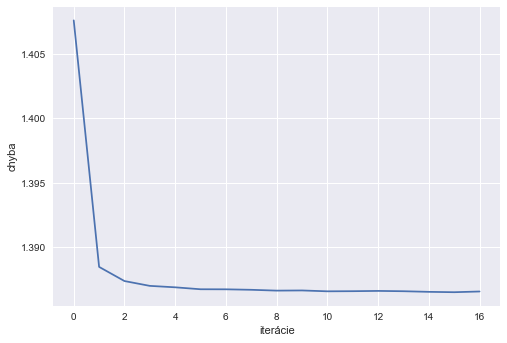

In [44]:
plt.xlabel('iterácie')
plt.ylabel('chyba')
plt.plot(modelmlp2.loss_curve_)

Podľa príznakov:<br>
    'Tiredness',
 'Dry-Cough',
 'Difficulty-in-Breathing',
 'Sore-Throat',
 'None_Sympton'<br>
    Určiť či bude mať človek:
        'Fever'

In [45]:
X3 = df[[
 'Tiredness',
 'Dry-Cough',
 'Difficulty-in-Breathing',
 'Sore-Throat',
 'None_Sympton',
        ]]
y3 = df[['Fever']]
test_data_size = 0.3
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = test_data_size)
train_data = pd.concat([X3_train, y3_train], axis = 1)
test_data = pd.concat([X3_test, y3_test], axis = 1)

In [46]:
modelmlp3=MLPClassifier(activation='relu',alpha=0.001,hidden_layer_sizes=(3,2),max_iter=10000)

In [47]:
print(modelmlp3.fit(X3_train,y3_train))
print("y3_train úspešnosť: %f" % modelmlp3.score(X3_train, y3_train))
print("y3_test úspešnosť: %f" % modelmlp3.score(X3_test, y3_test))

C:\Users\mvlca\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MLPClassifier(alpha=0.001, hidden_layer_sizes=(3, 2), max_iter=10000)
y3_train úspešnosť: 0.749995
y3_test úspešnosť: 0.750011


In [48]:
y3_pred = modelmlp3.predict(X3_test)

print(classification_report(y3_test, y3_pred))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83     65381
           1       0.66      0.40      0.50     29659

    accuracy                           0.75     95040
   macro avg       0.72      0.65      0.67     95040
weighted avg       0.74      0.75      0.73     95040



In [49]:
modelmlp3.best_loss_

0.5261533760705424

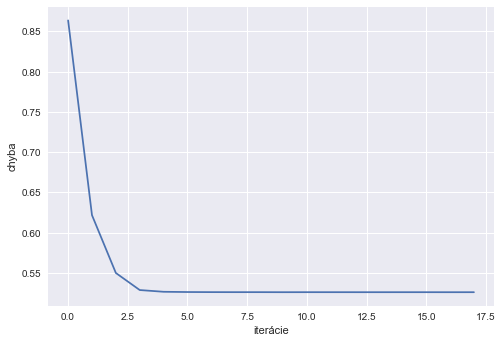

In [50]:
plt.xlabel('iterácie')
plt.ylabel('chyba')
plt.plot(modelmlp3.loss_curve_)

Podľa príznakov:<br>
 'Pains',
 'Nasal-Congestion',
 'Runny-Nose',
 'None_Experiencing'<br>
Určiť či bude mať človek: 'Diarrhea'

In [51]:
X4 = df[[
 'Pains',
 'Nasal-Congestion',
 'Runny-Nose',
 'None_Experiencing'
 ]]
y4 = df[[ 'Diarrhea'
 ]]
test_data_size = 0.3
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size = test_data_size)
train_data = pd.concat([X4_train, y4_train], axis = 1)
test_data = pd.concat([X4_test, y4_test], axis = 1)

In [52]:
modelmlp4=MLPClassifier(activation='relu',alpha=0.001,hidden_layer_sizes=(3,2),max_iter=10000)

In [53]:
print(modelmlp4.fit(X4_train,y4_train))
print("y4_train úspešnosť: %f" % modelmlp4.score(X4_train, y4_train))
print("y4_train úspešnosť: %f" % modelmlp4.score(X4_test, y4_test))

C:\Users\mvlca\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MLPClassifier(alpha=0.001, hidden_layer_sizes=(3, 2), max_iter=10000)
y4_train úspešnosť: 0.637211
y4_train úspešnosť: 0.634386


In [57]:
y4_pred = modelmlp4.predict(X4_test)

print(classification_report(y4_test, y4_pred))

              precision    recall  f1-score   support

           0       0.66      0.86      0.75     60273
           1       0.50      0.25      0.33     34767

    accuracy                           0.63     95040
   macro avg       0.58      0.55      0.54     95040
weighted avg       0.60      0.63      0.60     95040



In [54]:
modelmlp4.best_loss_

0.5492653076187969

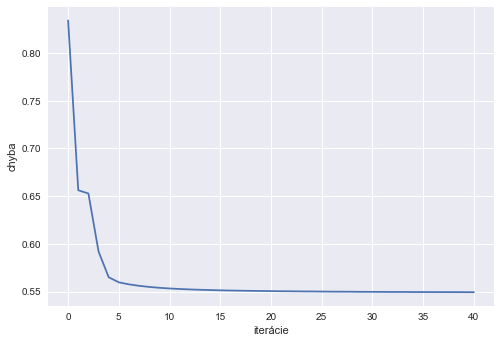

In [55]:
plt.xlabel('iterácie')
plt.ylabel('chyba')
plt.plot(modelmlp4.loss_curve_)